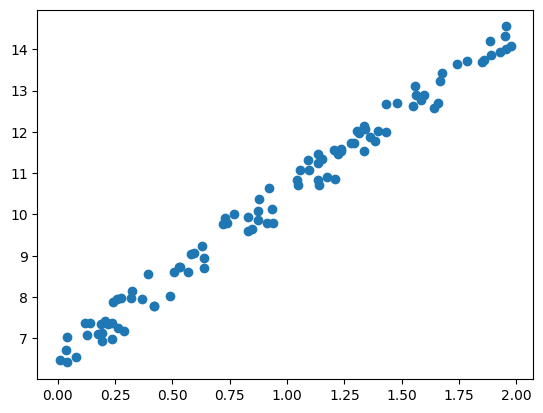

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(0)

x = 2 * np.random.rand(100,1)
y = 6 + 4*x + np.random.rand(100,1)

plt.scatter(x,y)

In [4]:
# w1과 w0 를 업데이트 할 w1_update, w0_update룰 변환

def get_weight_update(w1,w0,x,y,learning_rate = 0.01):
    n = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape 와 동일한 크기를 가진 0 값으로 초가화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열을 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(x,w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모드 1값을 가진 행렬 생성
    w0_factors = np.ones((n,1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산 
    w1_update = -(2/n)*learning_rate*(np.dot(x.T,diff))
    w0_update = -(2/n)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update

In [7]:
# 입력인자 iter로 주어진 횟수먄큼 반복적으로 w1,w0을 업데이트 적용함

def graidient_descent_steps(x,y,iters=10000):
    #w1과 w0을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for inr in range(iters):
        w1_update, w0_update = get_weight_update(w1,w0,x,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [9]:
def get_cost(y,y_pred):
    n = len(y)
    cost = np.sum(np.square(y-y_pred))/n # 오차값
    return cost


w1,w0 =  graidient_descent_steps(x,y,iters=1000)
print(w1,w0)
y_pred = w1[0,0] * x + w0
print(get_cost(y,y_pred))

[[4.02826026]] [[6.49047863]]
0.07754792006806614
